In [1]:
import tensorflow as tf

In [2]:
(x_train, y_train),(x_test, y_test) = tf.keras.datasets.reuters.load_data(num_words=10000)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

2113536/2110848 [==============================] - 0s 0us/step


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/reuters.py:143: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/reuters.py:144: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_test, y_test = np.array(xs[idx:]), np.array(labels[idx:])


((8982,), (8982,), (2246,), (2246,))

In [3]:
print(y_train[50], x_train[50])

4 [1, 1479, 1197, 71, 8, 25, 1479, 1197, 640, 71, 304, 471, 80, 9, 1379, 1901, 4530, 6797, 79, 5, 8144, 71, 175, 80, 58, 4, 1279, 5, 63, 32, 20, 5, 4, 326, 175, 80, 335, 7, 10, 845, 31, 4, 221, 9, 108, 259, 1479, 1197, 640, 8, 16, 600, 69, 68, 11, 15, 6, 8144, 21, 397, 321, 6, 438, 1761, 3072, 79, 5, 8144, 1040, 894, 1051, 617, 80, 4, 617, 80, 23, 1051, 172, 3814, 3206, 8144, 175, 79, 9, 1379, 6, 264, 395, 3814, 3206, 79, 1479, 1197, 9, 25, 323, 8, 4, 8144, 80, 23, 381, 43, 42, 205, 50, 77, 33, 909, 9, 3509, 22, 216, 6, 216, 17, 12]


In [4]:
len(x_train[50]), len(x_train[400]), len(x_train[200])

(118, 90, 212)

In [5]:
pad_x_train = tf.keras.preprocessing.sequence.pad_sequences(x_train, maxlen=500)
len(pad_x_train[50])

500

In [6]:
import numpy as np

In [7]:
np.unique(y_train).shape, np.unique(y_train)

((46,),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45]))

# make model

In [8]:
model = tf.keras.models.Sequential()

In [9]:
model.add(tf.keras.layers.Embedding(input_length=500, input_dim=10000, output_dim=24)) # input layer
model.add(tf.keras.layers.LSTM(24, return_sequences=True, activation='tanh'))
model.add(tf.keras.layers.LSTM(12, activation='tanh'))
# model.add(tf.keras.layers.Flatten()) # hidden layer
model.add(tf.keras.layers.Dense(46, activation='softmax')) # output layer

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['acc']) # gadget

In [ ]:
# hist = model.fit(pad_x_train, y_train, epochs=5, validation_split=0.3, batch_size=128)
hist = model.fit(pad_x_train, y_train, epochs=100, validation_split=0.3, batch_size=256)

# Evaluation

In [11]:
# 학습 시켰던 데이터
model.evaluate(pad_x_train, y_train) # loss: 2.4050 - acc: 0.3517

281/281 [==============================] - 17s 59ms/step - loss: 1.0164 - acc: 0.7838


[1.0163819789886475, 0.7837898135185242]

In [12]:
pad_x_train = tf.keras.preprocessing.sequence.pad_sequences(x_train, maxlen=500)
pad_x_test = tf.keras.preprocessing.sequence.pad_sequences(x_test, maxlen=500)

In [13]:
def pad_make(x_data):
  pad_x = tf.keras.preprocessing.sequence.pad_sequences(x_data, maxlen=500)
  return pad_x

In [14]:
pad_make_x = pad_make(x_test)

In [15]:
model.evaluate(pad_make_x, y_test)

71/71 [==============================] - 4s 60ms/step - loss: 1.9359 - acc: 0.6064


[1.9358940124511719, 0.6064113974571228]

In [16]:
model.evaluate(pad_x_test, y_test)

71/71 [==============================] - 4s 59ms/step - loss: 1.9359 - acc: 0.6064


[1.9358940124511719, 0.6064113974571228]

In [17]:
import matplotlib.pyplot as plt

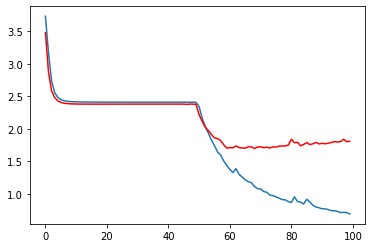

In [18]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'],'r-')
plt.show()

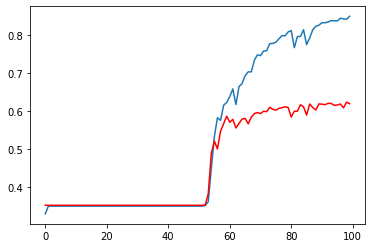

In [19]:
plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'],'r-')
plt.show()

In [20]:
from sklearn.metrics import classification_report

In [21]:
y_train_pred = model.predict(pad_x_train)
y_train_pred[0]

array([1.1133974e-04, 1.9083131e-03, 4.1176227e-05, 9.5160580e-01,
       3.6584757e-02, 2.0488229e-05, 1.3206111e-05, 3.2183641e-05,
       2.4918912e-04, 9.1662383e-05, 2.8973926e-04, 8.7703031e-04,
       5.4646898e-05, 2.4174132e-04, 2.9715793e-05, 2.8649931e-05,
       4.0496700e-03, 1.8319621e-04, 4.5075547e-05, 1.6983064e-03,
       2.7781326e-04, 1.4439286e-04, 1.9774570e-05, 6.6510627e-05,
       1.3911449e-05, 2.0848556e-05, 1.2289369e-05, 2.5014378e-05,
       4.2119942e-04, 3.1184678e-05, 6.8533351e-05, 3.3680913e-05,
       1.1010258e-05, 3.2911179e-05, 2.2129569e-04, 4.1586969e-05,
       4.0929299e-05, 2.0794030e-05, 3.6382899e-05, 3.7109512e-05,
       1.3729768e-04, 5.1578434e-05, 1.9946168e-05, 2.6343861e-05,
       2.1531028e-05, 9.9728322e-06], dtype=float32)

In [22]:
import numpy as np

In [23]:
y_pred = np.argmax(y_train_pred, axis=1)
y_pred.shape

(8982,)

In [24]:
len(y_train)

8982

In [ ]:
print(classification_report(y_train, y_pred))

In [27]:
y_test_pred = model.predict(pad_x_test)

In [28]:
y_pred = np.argmax(y_test_pred, axis=1)

In [ ]:
print(classification_report(y_test, y_pred))

# Service

In [32]:
# 문장 입력
# --> 숫자(사전을 기준) --> [, , , , ...] --> pad_sequence

model.predict()

TypeError: ignored